# LVDT Position Simulation Plots
### Analyse the position measurement of a normal LVDT with geometry as used in ETpathfinder large IP. 

#### Import everything

In [9]:
import numpy as np
import cmath
import scipy.optimize as opt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Read in data
[0] = positions, 
[1] = upper outer coil,
[2] = lower outer coil, 
[3] = inner coil
[4] = meta data: NSteps, StepSize, OutCoil_Current

In [10]:
files = ['LVDT_10kHz_32AWG_10mm_oG_oI.out','LVDT_10kHz_20mA_31AWG_10mm.out']

legends = ['32AWG original version','31AWG modified version']

inputdata = []
NSteps = []
StepSize = []
InnCoil_Current = []

for i in range(0,len(files)):
    inputarray = np.loadtxt(files[i], dtype=complex)
    inputdata.append(inputarray)
    NSteps.append(int(inputarray[4][0].real))
    StepSize.append(inputarray[4][1].real)
    InnCoil_Current.append(inputarray[4][2].real) 

print(inputdata)
print(NSteps)
print(StepSize)
print(InnCoil_Current)

[array([[-5.        +0.j        , -4.        +0.j        ,
        -3.        +0.j        , -2.        +0.j        ,
        -1.        +0.j        ,  0.        +0.j        ,
         1.        +0.j        ,  2.        +0.j        ,
         3.        +0.j        ,  4.        +0.j        ,
         5.        +0.j        ],
       [ 0.02194049+0.77625493j,  0.02280435+0.80902743j,
         0.02368902+0.84295362j,  0.02459314+0.87801613j,
         0.02551711+0.91414808j,  0.02645743+0.9513369j ,
         0.0274129 +0.98951212j,  0.02838206+1.02859386j,
         0.02936011+1.06850479j,  0.03034746+1.10912008j,
         0.03133565+1.15036587j],
       [ 0.03133453+1.15038344j,  0.03034647+1.10913109j,
         0.02936137+1.06849244j,  0.02838224+1.02858997j,
         0.0274138 +0.98950613j,  0.02645733+0.95133586j,
         0.02551578+0.91416084j,  0.02459221+0.87802409j,
         0.0236874 +0.84297341j,  0.02280405+0.80902532j,
         0.02194088+0.77625168j],
       [ 0.69322673+7.80725

#### Analyse and plot output data
Basic plots:

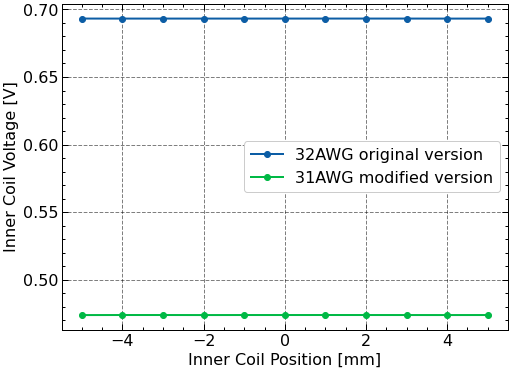

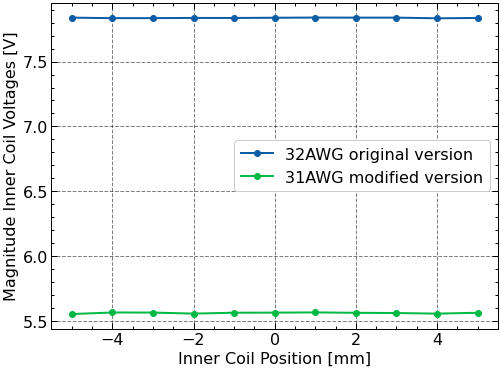

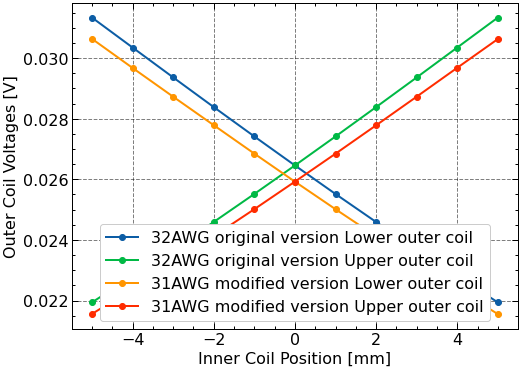

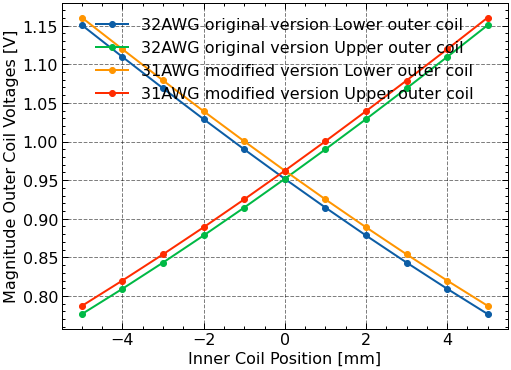

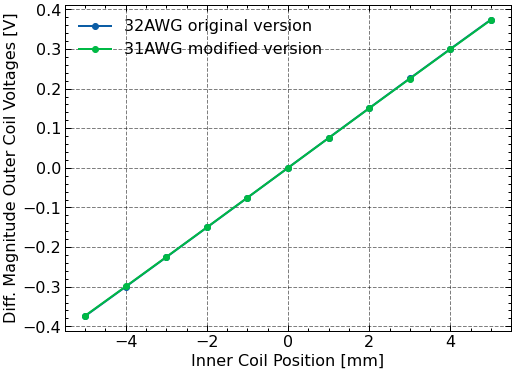

Phase offset: -0.0613287756744485 -0.06135482416010607
Phase offset: -0.059023559926046465 -0.05888348087148909


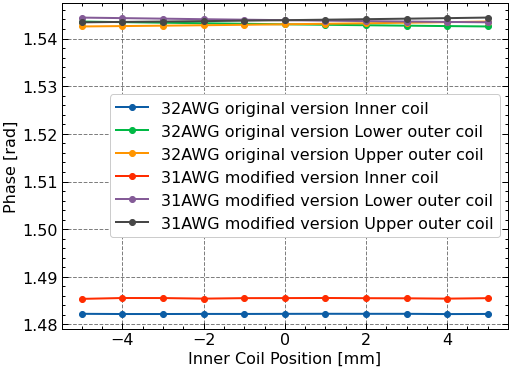

In [11]:
#print(plt.style.available)
plt.style.use(['science','grid','notebook'])

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][3].real, 'o-', label=legends[i])
plt.ylabel('Inner Coil Voltage [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(inputdata[i][3]), 'o-', label=legends[i])
plt.ylabel('Magnitude Inner Coil Voltages [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][2].real, 'o-', label=legends[i] + " Lower outer coil")
    plt.plot(inputdata[i][0], inputdata[i][1].real, 'o-', label=legends[i] + " Upper outer coil")
plt.ylabel('Outer Coil Voltages [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(inputdata[i][2]), 'o-', label=legends[i] + " Lower outer coil")
    plt.plot(inputdata[i][0], abs(inputdata[i][1]), 'o-', label=legends[i] + " Upper outer coil")
plt.ylabel('Magnitude Outer Coil Voltages [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(frameon=False)
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(inputdata[i][1]) - abs(inputdata[i][2]), 'o-', label=legends[i])
plt.ylabel('Diff. Magnitude Outer Coil Voltages [V]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(frameon=False)
plt.show()

InnCoil_Phases = []
LowOutCoil_Phases = []
UppOutCoil_Phases = []
for i in range(0,len(files)):
    InnCoil_Phases.append(np.angle(inputdata[i][3]))
    LowOutCoil_Phases.append(np.angle(inputdata[i][2]))
    UppOutCoil_Phases.append(np.angle(inputdata[i][1]))
    
for i in range(0,len(files)):    
    print("Phase offset:", InnCoil_Phases[i][0] - LowOutCoil_Phases[i][0], InnCoil_Phases[i][NSteps[i]] - UppOutCoil_Phases[i][NSteps[i]])
    plt.plot(inputdata[i][0], InnCoil_Phases[i], 'o-', label=legends[i] + " Inner coil")
    plt.plot(inputdata[i][0], LowOutCoil_Phases[i], 'o-', label=legends[i] + " Lower outer coil")
    plt.plot(inputdata[i][0], UppOutCoil_Phases[i], 'o-', label=legends[i] + " Upper outer coil")
plt.ylabel('Phase [rad]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

Create normalised response of the difference in the outer coils in V/mmA with magnitude of complex numbers and fit to check linearity and get sensitivity.

Fitted slope of the function: 32AWG original version 3.7503592603366953
Fitted slope of the function: 31AWG modified version 3.7416373973222172


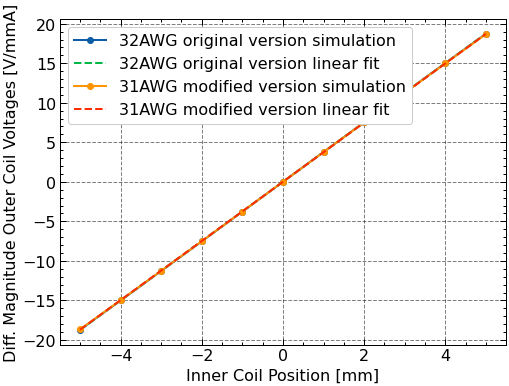

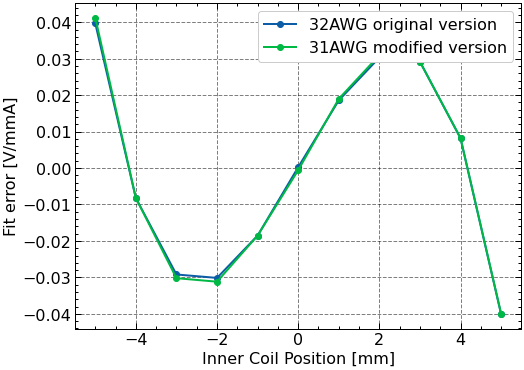

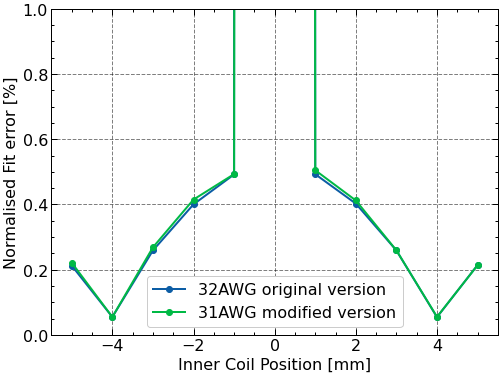

In [12]:
def linfunc(x, a, b):
     return a*x + b

Norm_OutCoil_Signals = []
fitted_Norm_OutCoil_Signals = []

for i in range(0,len(files)):
    Norm_OutCoil_Signals.append((abs(inputdata[i][1]) - abs(inputdata[i][2]))/StepSize[i]/InnCoil_Current[i])
    # fit range
    xrange = inputdata[i][0]
    fitx1 = -5.0
    fitx2 = 5.0
    x2 = xrange[(xrange >= fitx1) & (xrange <= fitx2)]
    y2 = Norm_OutCoil_Signals[i][(xrange >= fitx1) & (xrange <= fitx2)]
    optimizedParameters, pcov = opt.curve_fit(linfunc, x2, y2)
    print("Fitted slope of the function:",legends[i], optimizedParameters[0])
    fitted_Norm_OutCoil_Signals.append(linfunc(inputdata[i][0], *optimizedParameters))
    plt.plot(inputdata[i][0], Norm_OutCoil_Signals[i], 'o-', label=legends[i] + " simulation")
    plt.plot(inputdata[i][0], fitted_Norm_OutCoil_Signals[i], '--', label=legends[i] + " linear fit")

plt.ylabel('Diff. Magnitude Outer Coil Voltages [V/mmA]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], Norm_OutCoil_Signals[i] - fitted_Norm_OutCoil_Signals[i], 'o-', label=legends[i])
plt.ylabel('Fit error [V/mmA]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend()
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], 100*abs(Norm_OutCoil_Signals[i] - fitted_Norm_OutCoil_Signals[i])/abs(Norm_OutCoil_Signals[i]), 'o-', label=legends[i])
plt.ylabel('Normalised Fit error [%]')
plt.xlabel('Inner Coil Position [mm]')
plt.ylim(0.0,1.0)
plt.legend()
plt.show()